Air Bnb

In [77]:
#Importing Necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import array
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [78]:
#Mount the Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Emperical/AirBNB_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [80]:
#Understanding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [81]:
#Statistical Description of dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [82]:
#Checking the Missing/Null Values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [83]:
#Checking the Unique value of dataset
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [84]:
#Checking the duplicate value in dataset
df.duplicated().sum()

0

#Exploratory Data Analysis

In [85]:
# EDA for the Room types
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

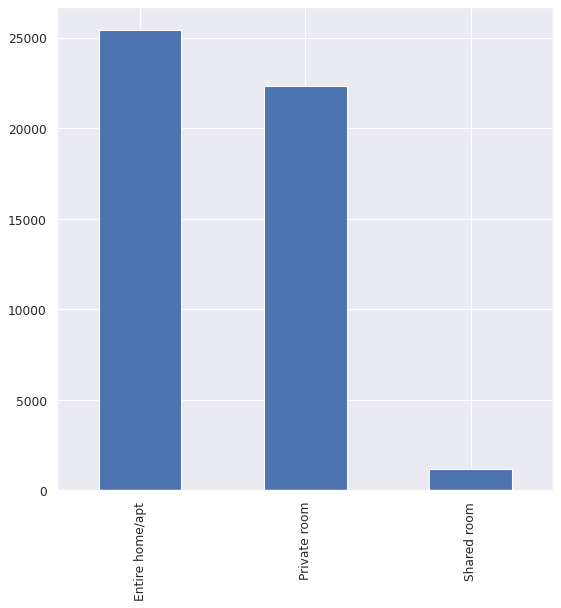

In [86]:
#Plot for the room_type
fig = plt.figure(figsize=(8,8), dpi=80)
df['room_type'].value_counts().plot(kind='bar')

In [87]:
#EDA for Price
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

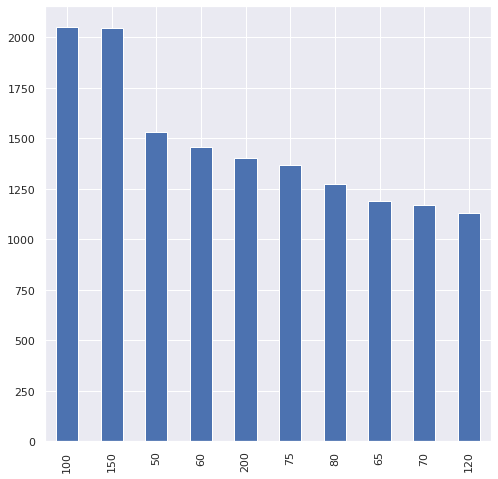

In [88]:
#Visualization for price
df.price.value_counts().iloc[:10].plot(figsize=(8,8), kind = 'bar')

In [89]:
##Statistical Description of price
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [90]:
#Checking the dataset with high price 
df[df['price'] ==10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


In [91]:
# EDA for neighbourhood_group
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

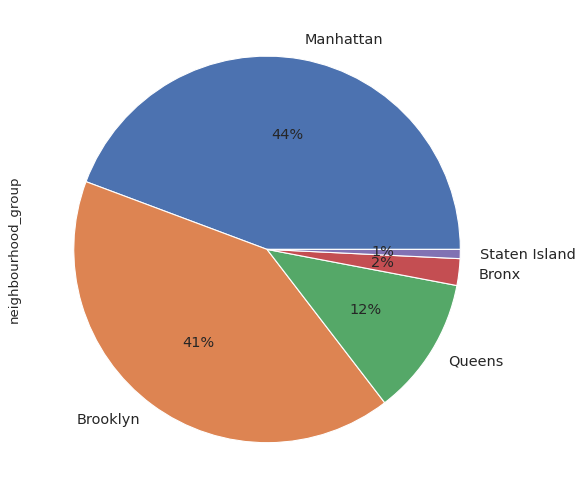

In [92]:
#Visualization for neighbourhood_group
fig = plt.figure(figsize=(8,8), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

In [93]:
#EDA for neighbourhood
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [94]:
#Checking the unique value of neighbourhood
df['neighbourhood'].unique()  

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

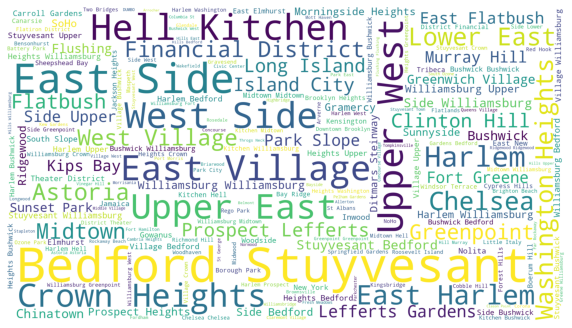

In [95]:
#Word Cloud for neighbourhood
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [96]:
#EDA for reviews_per_month'
df[df['reviews_per_month'] > 1].reviews_per_month.value_counts().sum() 

15908

In [97]:
#Getting the reviews_per_month which have greater than 1
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]  

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

In [98]:
#Getting the maximum value for reviews_per_month
df['reviews_per_month'].max()

58.5

In [99]:
#checking the maximum reviews_per_month in dataset
df[df['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


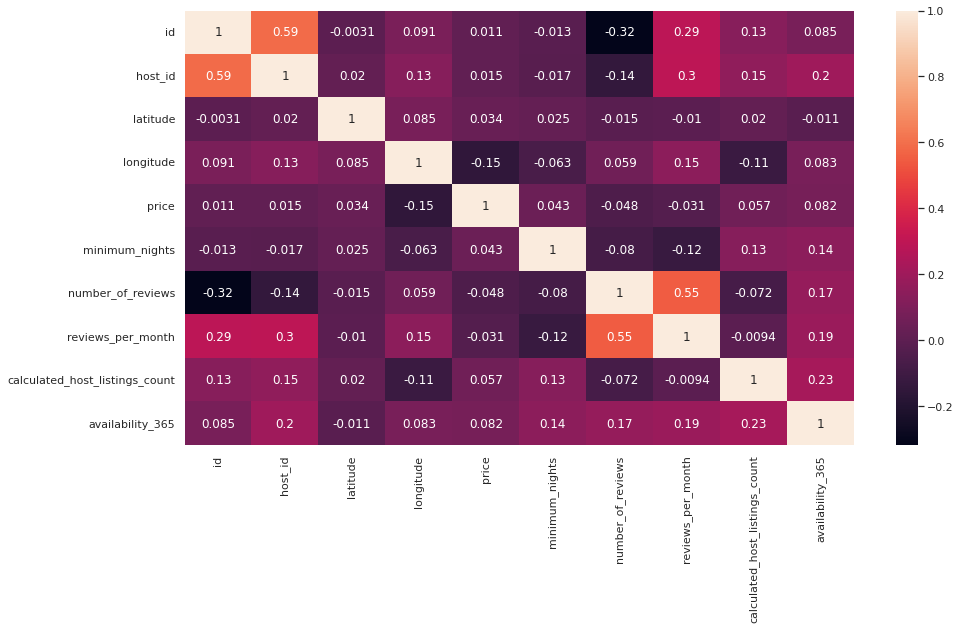

In [100]:
#Correlation Between Continuous Variables
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

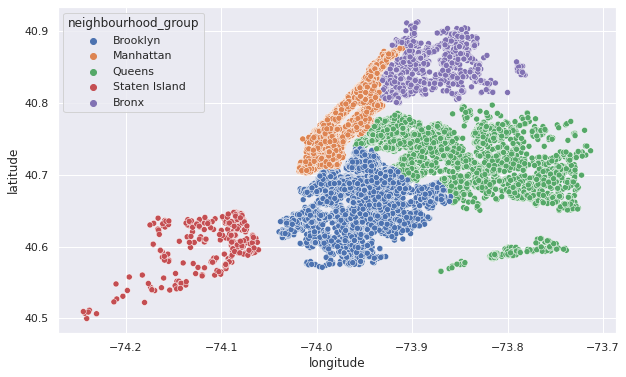

In [101]:
#Scatterplot for latitude with neighbourhood_group
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

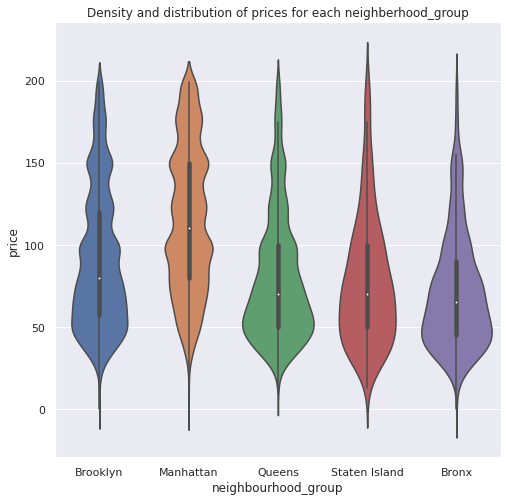

In [102]:
#Visualization for Density of price for neighbourhood_group
v2=sns.violinplot(data=df[df.price < 200], x='neighbourhood_group', y='price')
v2.set_title('Density and distribution of prices for each neighberhood_group')

In [103]:
#Count for the neighbourhood
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

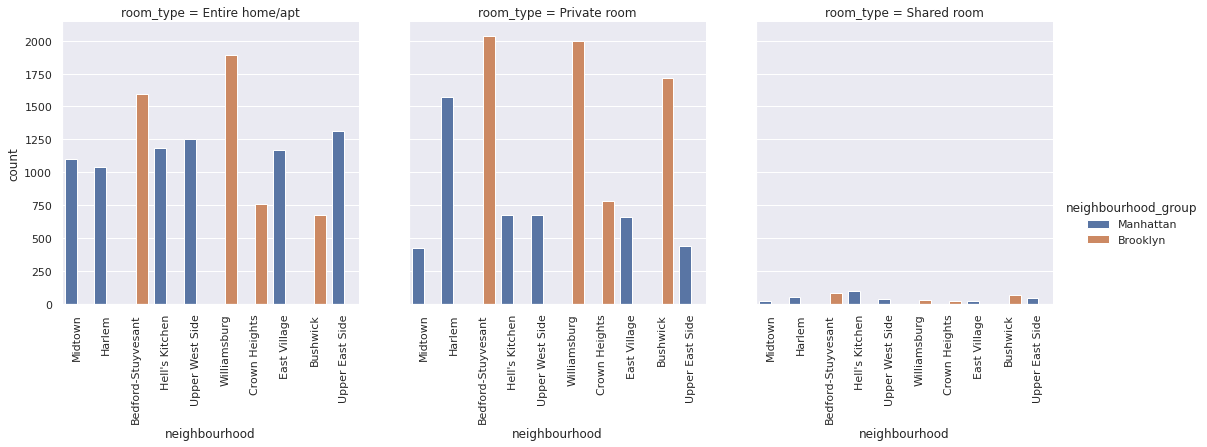

In [104]:
#Visualization for subplot of Neighbourhood
Ngbr =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=Ngbr, kind='count')
pl.set_xticklabels(rotation=90)

#DATA CLEANING

In [105]:
#Unwanted columns such as id,name , host_name and last_review which is not useful for analysis so, they are removed.
df.drop(['host_id','name','latitude','longitude','id','host_name','last_review'], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [106]:
#Droping the null values
df = df.dropna()

In [107]:
#Verify the Missing/Null Values after drop
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [108]:
#Understanding data types without null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38843 non-null  object 
 1   neighbourhood                   38843 non-null  object 
 2   room_type                       38843 non-null  object 
 3   price                           38843 non-null  int64  
 4   minimum_nights                  38843 non-null  int64  
 5   number_of_reviews               38843 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  38843 non-null  int64  
 8   availability_365                38843 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.0+ MB


There are significant outliers in the "price" variable.
In order to reduce the impact of outliers and increase the normalcy of the data, we will take the data between the 25th and 75th percentiles. 

In [109]:
#Taking the dataset between the 25th and 75th percentiles to remove the outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR=Q3-Q1
df = df[~((df['price']<(Q1-1.5*IQR))|(df['price']>(Q3+1.5-IQR)))]

In [110]:
#Understanding data types after removing the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10928 entries, 6 to 48852
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             10928 non-null  object 
 1   neighbourhood                   10928 non-null  object 
 2   room_type                       10928 non-null  object 
 3   price                           10928 non-null  int64  
 4   minimum_nights                  10928 non-null  int64  
 5   number_of_reviews               10928 non-null  int64  
 6   reviews_per_month               10928 non-null  float64
 7   calculated_host_listings_count  10928 non-null  int64  
 8   availability_365                10928 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 853.8+ KB


#Statistical Analysis

In [111]:
#Shapiro Test (for checking Normality)
import scipy.stats as st
res = st.shapiro(df.price)
print("The Shapiro Test for the price is: ",res)

The Shapiro Test for the price is:  ShapiroResult(statistic=0.9598448872566223, pvalue=0.0)


The null hypothesis is disproved because the p value (0.0) is less than alpha (5%, as assumed). The distribution is therefore abnormal (as cound be seen from the Distribution Plot above). Since the distribution is non-normal, the data can only theoretically be tested using non-parametric methods.


##Price vs Room Type

In [112]:
#Checking the unique value of the room_type
df.room_type.unique()

array(['Private room', 'Shared room', 'Entire home/apt'], dtype=object)

In [113]:
#Assigning the Unique values
pvt = df[df['room_type'] == 'Private room']
share = df[df['room_type'] == 'Shared room']
apt = df[df['room_type'] == 'Entire home/apt']

In [114]:
#Levene Test (for testing of variance)
res = st.levene(pvt.price, share.price, apt.price)
print(" The Levene Test for Price vs Room Typeis: \n ",res)

 The Levene Test for Price vs Room Typeis: 
  LeveneResult(statistic=49.601030751888054, pvalue=3.595499462501306e-22)


We reject hypothesis since the p value is almost zero (and consequently less than alpha = 0.05). As a result, there is a difference in the price variation across the various accommodation classifications. This is demonstrated by looking at the boxplot below.

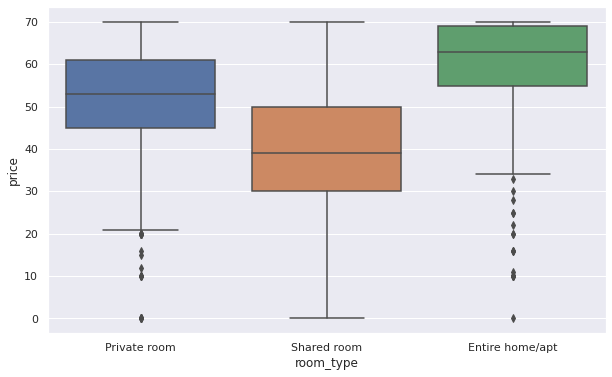

In [115]:
#Visaulization of room_type according to price
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='room_type',data=df)
plt.show()

In [116]:
#Kruskal Wallis Test
res = st.kruskal(pvt.price,share.price,apt.price)
print(" The Kruskal Wallis Test for Price vs Room Type is: \n ",res)

 The Kruskal Wallis Test for Price vs Room Type is: 
  KruskalResult(statistic=743.0418084009106, pvalue=4.472201820222499e-162)


P value alpha is present in the test result is above the 0.05.
As a result, the null hypothesis is disproved.
This suggests that there is a difference in the mean price of various types of apartments.
The barplot of the mean prices given below serves as confirmation. 

In [117]:

ind = ['Private Rooms','Apartments','Shared Rooms']
Price_M = pd.DataFrame([pvt.price.mean(),apt.price.mean(),share.price.mean()], index=ind)
Price_M

,0
Private Rooms,52.878294
Apartments,59.867133
Shared Rooms,41.067797


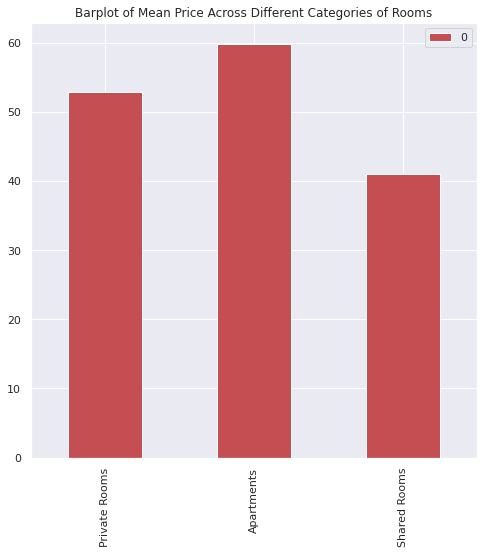

In [118]:
#Visualization for Mean Price Across Different Categories of Rooms 
Price_M.plot.bar(color='r')
plt.title("Barplot of Mean Price Across Different Categories of Rooms")
plt.show()

Conclusion: The two variables, price and room type, are related. Since the mean price for each type of room is different, the cost will vary depending on the choice of room.

##One Way ANOVA

In [119]:
#Verifying the One way Anova
st.f_oneway(pvt.price,share.price,apt.price)

F_onewayResult(statistic=467.2078865807108, pvalue=2.0248725123817457e-195)

As a result, the null hypothesis is rejected in one direction of the ANOVA, indicating that the mean prices for the various types of rooms are not equal.

##Price vs Neighbourhood

The categorical variable of "neighbourhood group" has more than two categories, we can use either the Kruskal Wallis test or the One Way ANOVA test.

In [120]:
#Kruskal Wallis Test
r = df[df['neighbourhood_group'] == 'Brooklyn']['price']
s = df[df['neighbourhood_group'] == 'Manhattan']['price']
t = df[df['neighbourhood_group'] == 'Queens']['price']
u = df[df['neighbourhood_group'] == 'Staten Island']['price']
v = df[df['neighbourhood_group'] == 'Bronx']['price']

res = st.kruskal(r,s,t,u,v)
print(" The Kruskal Wallis Test for neighbourhood_group is: \n ",res)

 The Kruskal Wallis Test for neighbourhood_group is: 
  KruskalResult(statistic=321.98501542014543, pvalue=1.955857466328019e-68)


Since the P-value is close to 0. Hence, we say that there is a link between price and neighbourhood group, i.e. the price is based on the neighbourhood group that the house is offered in.

In [121]:
#One way Anova
res = st.f_oneway(r,s,t,u,v)
print(" The One way Anova for neighbourhood_group is: \n ",res)

 The One way Anova for neighbourhood_group is: 
  F_onewayResult(statistic=82.73884435819998, pvalue=2.5683471790581827e-69)


Hence, the P-value is less than 0 as before.So, we reject the hypothesis.

##Room Type vs Neighbourhood Group

In [122]:
#Chi Squared Test
ch = pd.crosstab(df['room_type'],df['neighbourhood_group'])
res = st.chi2_contingency(ch)
print(" The Chi Squared Test for neighbourhood_group and room_type is: \n ",res)

 The Chi Squared Test for neighbourhood_group and room_type is: 
  (125.17127733105427, 2.82913614107e-23, 8, array([[  32.97584187,  376.6704795 ,  147.40986457,  148.1295754 ,
           9.81423865],
       [ 441.09224012, 5038.42862372, 1971.78733529, 1981.41434846,
         131.27745242],
       [  29.93191801,  341.90089678,  133.80280015,  134.45607613,
           8.90830893]]))


Here, we get the P-value 2.899e-23 which is less than alpha 0.05 and hence, we reject the null hypothesis.
Since, we can say that there is relationship between the neighbourhood_group and room_type and also shown as stacked bar plot.

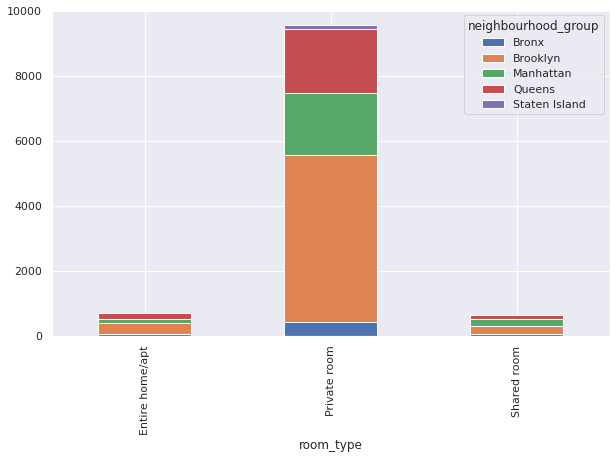

In [123]:
#Stacked bar plot for neighbourhood_group and room_type
SG = pd.crosstab(df['room_type'],df['neighbourhood_group'])
SG.plot.bar(figsize=(10,6),stacked=True)
plt.show()


##Neighbourhood vs Neighbourhood Group

In [124]:
#Chi-Squared Test
CH = pd.crosstab(df['neighbourhood'],df['neighbourhood_group'])
st.chi2_contingency(CH)

(43712.00000000001,
 0.0,
 784,
 array([[9.22401171e-01, 1.05362372e+01, 4.12335286e+00, 4.14348463e+00,
         2.74524158e-01],
        [9.22401171e-02, 1.05362372e+00, 4.12335286e-01, 4.14348463e-01,
         2.74524158e-02],
        [4.61200586e-01, 5.26811859e+00, 2.06167643e+00, 2.07174231e+00,
         1.37262079e-01],
        [6.91800878e-01, 7.90217789e+00, 3.09251464e+00, 3.10761347e+00,
         2.05893119e-01],
        [1.30519766e+01, 1.49087756e+02, 5.83454429e+01, 5.86303075e+01,
         3.88451684e+00],
        [3.22840410e-01, 3.68768302e+00, 1.44317350e+00, 1.45021962e+00,
         9.60834553e-02],
        [1.38360176e-01, 1.58043558e+00, 6.18502928e-01, 6.21522694e-01,
         4.11786237e-02],
        [1.89092240e+00, 2.15992862e+01, 8.45287335e+00, 8.49414348e+00,
         5.62774524e-01],
        [4.61200586e-02, 5.26811859e-01, 2.06167643e-01, 2.07174231e-01,
         1.37262079e-02],
        [4.61200586e-02, 5.26811859e-01, 2.06167643e-01, 2.07174231e-01,
    

Here also, the null hypothesis is rejected as the P-value is 0 which is less than 0.05. Hence, there is relationship between Neighbourhood and Neighbourhood Group

##T-Test

In [125]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 8,8
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [126]:
#Create a function for distrubtion plot
def plt_dstrb(inp):
    plt.figure()
    ax = sns.distplot(inp)
    ax.set_xlim([30, 365])
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=3)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [127]:
#Getting data of airbnb's available over a month
df_H = df[['neighbourhood_group','availability_365']]
df_H = df_H[df_H['availability_365'] > 30]
df_H.head()

,neighbourhood_group,availability_365
25,Brooklyn,85
28,Manhattan,311
30,Manhattan,355
31,Manhattan,255
32,Brooklyn,284


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

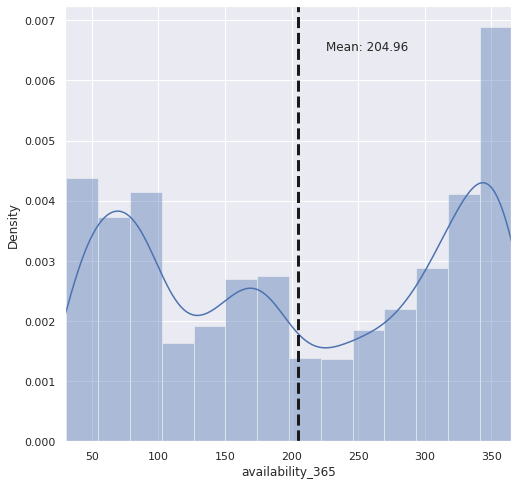

In [128]:
#Visaulization with mean
plt_dstrb(df_H['availability_365'])

In [129]:
#Taking small sample size for t-test which would be invalid
sample_S = 2000
Sample_A = np.random.choice(df_H['availability_365'],sample_S)
Sample_A

array([340, 247, 332, ...,  90, 310,  96])

In [130]:
#Mean of random value
np.mean(Sample_A)

205.6315

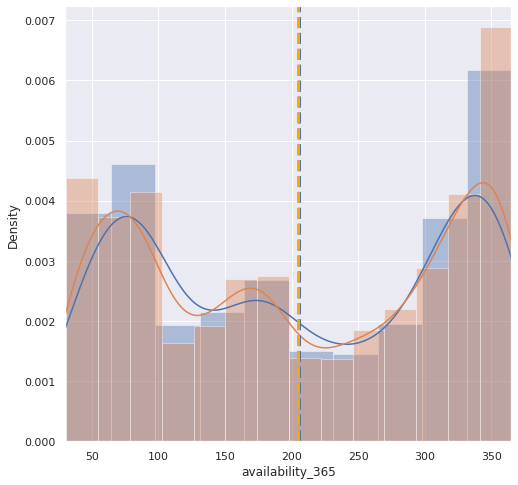

In [131]:
#plot and overlay to get the mean of each on graph
plt.figure()
ax1 = sns.distplot(Sample_A)
ax2 = sns.distplot(df_H['availability_365'])
ax1.set_xlim([30, 365])
ax2.set_xlim([30, 365])
plt.axvline(np.mean(Sample_A), color='b', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(df_H['availability_365']), color='orange', linestyle='dashed', linewidth=3)

We have imported T-test using the Scipy library, which allows us to do t-tests and obtain p-values.

In [132]:
#T_test Function for comparing
def cmp_grp(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions hence we fail to reject H0(Null Hypothesis)')
    else:
        print('Different distributions hence we reject H0(Null Hypothesis)')

cmp_grp(df_H['availability_365'], Sample_A, 0.05)

Statistics=-0.227, p=0.821
Same distributions hence we fail to reject H0(Null Hypothesis)


We get the P-value 0.663 which is above the 0.05. Since, we fail to reject the Hypothesis and hence, we accept the null hypothesis.

#Encoding Data and Outlier removal.

In [133]:
#Encoding the categorical data
df.fillna({'reviews_per_month':0}, inplace=True)
#df.drop(['id','host_id','latitude','longitude','host_name','last_review','name'], axis = 1,inplace=True)
df = pd.get_dummies(df, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
df.drop(["neighbourhood"], axis=1, inplace=True)
df.head()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
6,60,45,49,0.40,1,0,1,0,0,0,1,0
25,60,1,19,1.37,2,85,1,0,0,0,1,0
28,44,3,108,1.11,3,311,0,1,0,0,1,0
30,50,3,242,2.04,3,355,0,1,0,0,1,0
31,52,2,88,1.42,1,255,0,1,0,0,1,0


Linear Regression

In [134]:
def linear(a,b):
  global X,y,predictions,residue
  X = Reg_df[a].values.reshape(-1,1)
  y = Reg_df[b].values.reshape(-1,1)
  

  #3 Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()

  X = sc_X.fit_transform(X)
  y = sc_X.fit_transform(y)

  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(X, y)

  print("The linear model is: Y = {:.2} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

  print("Regression Intercept : ",reg.intercept_[0])


  predictions = reg.predict(X)
  rms = mean_squared_error(y, predictions, squared=False)

  fig = px.scatter(
    Reg_df, x=a, y=b, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
  fig.show()

  # Plot the residuals after fitting a linear model
  sns.residplot(x=X, y=y, lowess=True, color="g")

  print("RMSE is: ", rms)
  x2 = sm.add_constant(X)

  est = sm.OLS(y, x2)
  #OLS is Ordinary Least Squares

  #est.TAB
  est2 = est.fit()
  print(est2.summary())

  residue = y - predictions

In [135]:
Reg_df = df[['number_of_reviews','reviews_per_month']]
Reg_df= Reg_df[Reg_df['number_of_reviews']<400]
Reg_df = Reg_df[Reg_df['reviews_per_month']<15]
Reg_df

,number_of_reviews,reviews_per_month
6,49,0.40
25,19,1.37
28,108,1.11
30,242,2.04
31,88,1.42
...,...,...
48534,1,1.00
48636,2,2.00
48701,2,2.00
48790,1,1.00


The linear model is: Y = -4.2e-17 + 0.57X
Regression Intercept :  -4.172376831695239e-17


RMSE is:  0.8213420228839912
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     5256.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:04:45   Log-Likelihood:                -13320.
No. Observations:               10899   AIC:                         2.664e+04
Df Residuals:                   10897   BIC:                         2.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.802e-17  

,number_of_reviews,reviews_per_month,Predictions,Residue
0,NaN,NaN,0.284484,-0.879525
1,NaN,NaN,-0.104686,0.070083
2,NaN,NaN,1.049851,-1.234674
3,NaN,NaN,2.788142,-2.435637
4,NaN,NaN,0.790405,-0.796118


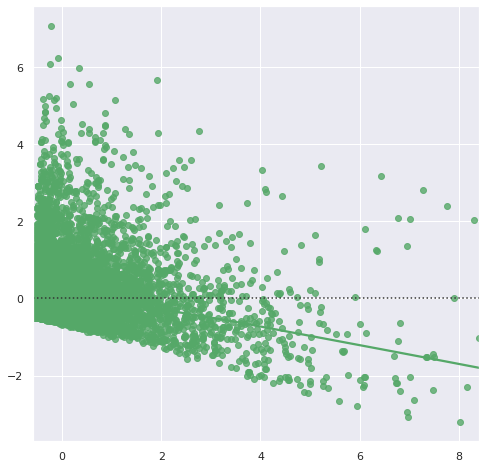

In [136]:
linear('number_of_reviews','reviews_per_month')
df_n = pd.DataFrame(predictions, columns = ['Predictions'])
df_reg_new = pd.concat([Reg_df,df_n],axis = 1)
df_n = pd.DataFrame(residue, columns = ['Residue'])
df_reg_new = pd.concat([df_reg_new,df_n],axis = 1)
df_reg_new[['number_of_reviews','reviews_per_month','Predictions','Residue']].head()

#Multiple Linear Regression

In [137]:
#Dividing into Target value
df_train = df.drop(['price'],axis=1)
df_test = df['price'].values.reshape(-1,1)

df_train_Sc = StandardScaler()
df_test_Sc = StandardScaler()

df_train = df_train_Sc.fit_transform(df_train)
df_test = df_train_Sc.fit_transform(df_test)

In [138]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.30, random_state=42)

In [139]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7649, 11)
(7649, 1)
(3279, 11)
(3279, 1)


In [140]:

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print("intercept is: ",linreg.intercept_)

print("coefficients are: ",linreg.coef_)

intercept is:  [0.00334485]
coefficients are:  [[-0.04613508  0.00968174  0.03002607 -0.08917603  0.0708094   0.21510916
   0.31905844  0.13936999 -0.00727299 -0.21025422 -0.39427262]]


In [141]:
y_pred = linreg.predict(X_test)

In [142]:

print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.13935718762733007


mean_absolute_error : 0.7604323398842785


mean_squared_error :  0.8615707446682286


root_mean_squared_error :  0.9282083519707354


In [143]:

my_pipeline = Pipeline(steps=[('model', LinearRegression())])

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* scores
scores1 =  1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='r2')
scores2 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')
scores3 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')

print("R squared scores:\n", scores1)
print("Average R squared score (across experiments):",scores1.mean())


print("RMSE scores:\n", scores3)
print("Average RMSE score (across experiments):",scores3.mean())

R squared scores:
 [-2.68983001  0.35656977  0.52437256  0.77114788  0.73031733  0.63570778
  0.46359052  0.20194511  0.00656353 -0.72625699]
Average R squared score (across experiments): 0.027412748488921234
RMSE scores:
 [1.21413378 0.5732473  0.48369005 0.42590084 0.50297081 0.58300332
 0.74908638 0.91220924 1.16354122 1.59120783]
Average RMSE score (across experiments): 0.8198990775340705


In [144]:
x2 = sm.add_constant(X)
est = sm.OLS(y, x2)
#OLS is Ordinary Least Squares
#est.TAB
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     5256.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:04:46   Log-Likelihood:                -13320.
No. Observations:               10899   AIC:                         2.664e+04
Df Residuals:                   10897   BIC:                         2.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.802e-17      0.008  -7.37e-15      1.0